# Логистическая регрессия с нуля (machine learrrning)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Визуальный пример линейного классификатора

Сгенерируем данные и обучим на них модель

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, n_features=2, random_state=12, centers=2)
display(X, y)

array([[ -5.2000508 ,   1.03101087],
       [ -6.26268518,   1.70399904],
       [ -6.09933951,  -0.51965652],
       [ -2.90487898,  -0.32621368],
       [ -7.51456607,   5.27345092],
       [ -7.91394699,   4.08713764],
       [ -4.93302704,   0.93256045],
       [ -6.27598204,   5.3283266 ],
       [ -3.73275694,   0.62337287],
       [ -6.88132681,   4.12304857],
       [ -5.30551643,   0.07148875],
       [ -8.59849966,   3.01289968],
       [ -7.2543384 ,   4.21572565],
       [ -3.2624657 ,   2.31125078],
       [ -3.79012431,   1.03243209],
       [ -6.41487085,   4.93984011],
       [ -6.16360032,   3.26627259],
       [ -7.94627336,   6.01079038],
       [ -3.86173157,  -0.77157158],
       [ -7.44514747,   4.76178476],
       [ -6.7017672 ,   4.41663513],
       [ -5.58091181,   5.11965922],
       [ -6.82539091,   0.82134757],
       [ -6.91161607,   4.68076626],
       [ -7.03166309,   7.04281172],
       [ -4.83896768,   1.18681003],
       [ -5.42257839,   1.47741832],
 

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1])

Стандартизируем данные

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X.mean(axis=0), X.std(axis=0)

(array([-7.77156117e-17, -2.22044605e-16]), array([1., 1.]))

Отрисуем данные наши данные на плоскости

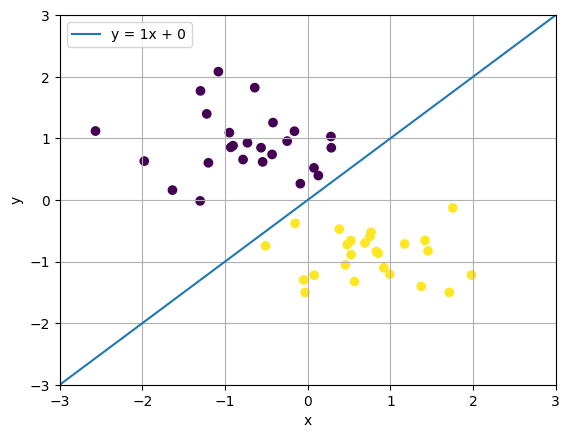

In [4]:
x = np.arange(-3, 4)
a = 1
b = 0

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(x, a * x + b, label=f"y = {a}x + {b}")
plt.ylabel('y'); plt.xlabel('x')
plt.ylim(-3, 3); plt.xlim(-3, 3)
plt.grid()
plt.legend()
plt.show()

## Одномерная логистическая регрессия

Сгенерируем одномерные данные:
- из 25 точек (n_samples=25),
- одного признака (n_features=1),
- он же полезный признак (n_informative=1),
- нет бесполезных признаков (n_redundant=0),
- фиксируем случайность (random_state=11),
- один кластер для одного класса (n_clusters_per_class=1),
- классовая разделимость равна 0,4 (class_sep=0.4)

In [5]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=25, n_features=1, n_informative=1,
                          n_redundant=0, random_state=11, n_clusters_per_class=1,
                          class_sep=0.4)
display(X, y)

array([[-0.86305361],
       [-1.4372011 ],
       [ 0.19592225],
       [-0.87164985],
       [ 0.00982831],
       [ 1.30282593],
       [ 0.16134434],
       [-0.9223264 ],
       [-0.10173176],
       [ 0.41006497],
       [ 0.27129997],
       [-0.71111212],
       [-2.98259876],
       [-0.09300387],
       [ 0.82285659],
       [ 0.16493473],
       [-0.40806382],
       [ 0.62136283],
       [ 0.76258897],
       [-0.11001122],
       [-1.26261842],
       [ 0.04513441],
       [ 0.50026937],
       [-0.6784482 ],
       [ 0.2182344 ]])

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1])

Полученные данные не в стандартном виде, т.е. средние значения не 0 и стандартное отклонение не 1:

In [6]:
X.mean(axis=0), X.std(axis=0)

(array([-0.19820608]), array([0.87333629]))

Стандартизируем данные

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.mean(axis=0), X.std(axis=0)

(array([1.77635684e-17]), array([1.]))

Построим график

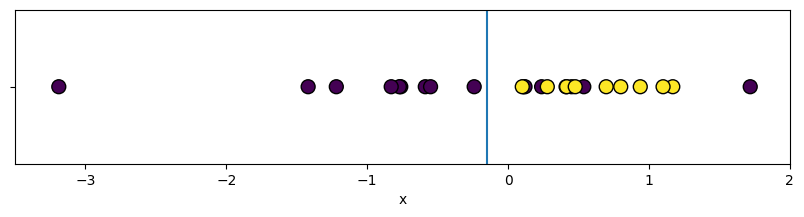

In [8]:
plt.figure(figsize=(10, 2))
plt.scatter(X, np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')
plt.plot([-0.15, -0.15], [-1, 1])
plt.ylabel(''); plt.xlabel('x')
plt.yticks(np.arange(0, 1), [''])
plt.ylim(-1, 1); plt.xlim(-3.5, 2)
plt.show()

Добавим наклон для разделительной линии:

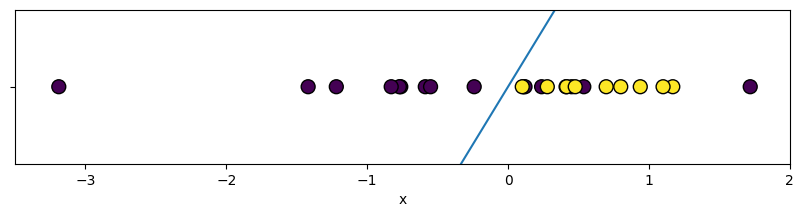

In [9]:
plt.figure(figsize=(10, 2))
plt.scatter(X, np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')

x = np.linspace(-3, 3)
plt.plot(x, 3 * x + 0)
plt.ylabel(''); plt.xlabel('x')
plt.yticks(np.arange(0, 1), [''])
plt.ylim(-1, 1); plt.xlim(-3.5, 2)
plt.show()

Обучаем модель **LogisticRegression** из **sklearn** из модуля **linear_model**

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model

LogisticRegression()

In [11]:
model.fit(X, y)

LogisticRegression()

Получим коэффициенты наклона и сдвига:

In [12]:
model.coef_, model.intercept_

(array([[1.34494091]]), array([-0.19801197]))

Визуализируем полученные результаты:

In [13]:
model_a = model.coef_[0]
model_b = model.intercept_

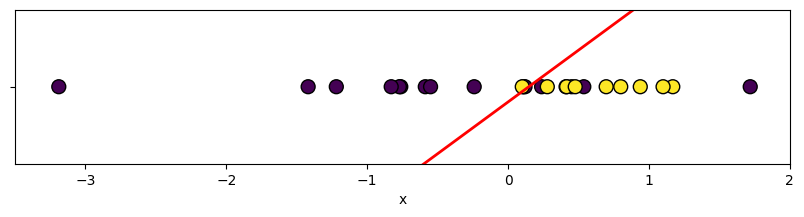

In [14]:
model_y_sk = model_a * x + model_b
x = np.linspace(-3, 3)

plt.figure(figsize=(10, 2))
plt.plot(x, model_y_sk, linewidth=2, c='r')
plt.scatter(X, np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')
plt.ylabel(''); plt.xlabel('x')
plt.yticks(np.arange(0, 1), [''])
plt.ylim(-1, 1); plt.xlim(-3.5, 2)
plt.show()

In [15]:
model.score(X, y)

0.8

Сделаем предсказания при помощи этой модели, подставив данные в метод **predict**

In [16]:
y_pred_cl = model.predict(X)
y_pred_cl[:5]

array([0, 0, 1, 0, 1])

Можно сделать предсказание, умножив коэффициент наклона на значение признака и прибавив к этому коэффициент сдвига:

In [17]:
y_pred = model_a * X + model_b
y_pred[:5]

array([[-1.22187946],
       [-2.1060686 ],
       [ 0.40894703],
       [-1.23511771],
       [ 0.12236172]])

Построим визуализацию:

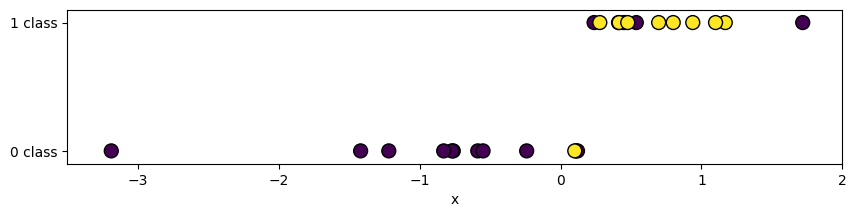

In [18]:
plt.figure(figsize=(10, 2))
plt.scatter(X, y_pred_cl, c=y, s=100, edgecolors='black')
plt.ylabel(''); plt.xlabel('x')
plt.yticks(np.arange(0, 2), ['0 class','1 class'])
plt.ylim(-0.1, 1.1); plt.xlim(-3.5, 2)
plt.show()

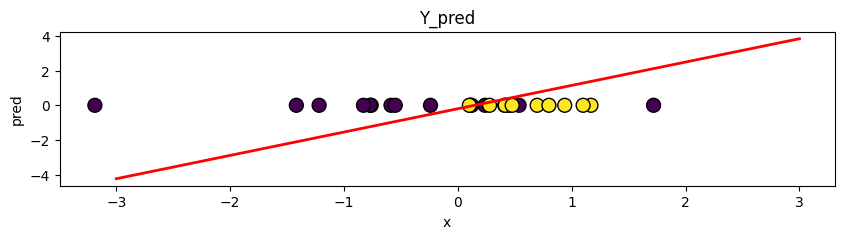

In [19]:
model_y_sk = model_a * x + model_b

plt.figure(figsize=(10, 2))
plt.plot(x, model_y_sk, linewidth=2, c='r')
plt.scatter(X, np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')
plt.ylabel('pred'); plt.xlabel('x')
plt.title('Y_pred')
plt.show()

Предскажем вероятности, подставив данные в метод **predict_proba**:

In [20]:
pred_proba = model.predict_proba(X)
pred_proba[:5]

array([[0.77239413, 0.22760587],
       [0.89149162, 0.10850838],
       [0.39916463, 0.60083537],
       [0.77471304, 0.22528696],
       [0.46944768, 0.53055232]])

Покажем вероятность быть только целевым классом:

In [21]:
pred_proba = pred_proba[:, 1]
pred_proba[:5]

array([0.22760587, 0.10850838, 0.60083537, 0.22528696, 0.53055232])

Отрисуем полученные вероятности на графике:

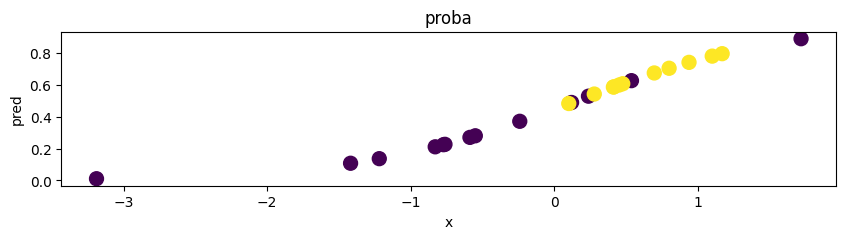

In [22]:
plt.figure(figsize=(10, 2))
plt.scatter(X, pred_proba, c=y, s=100)
plt.ylabel('pred'); plt.xlabel('x')
plt.title('proba')
plt.show()

Добавим сигмоиду

In [23]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

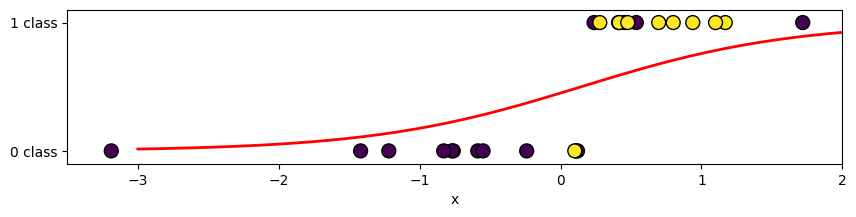

In [24]:
x = np.linspace(-3, 3)
plt.figure(figsize=(10, 2))
plt.scatter(X, y_pred_cl, c=y, s=100, edgecolors='black')
plt.plot(x, sigmoid(model_y_sk), linewidth=2, c='r')
plt.ylabel(''); plt.xlabel('x')
plt.yticks(np.arange(0, 2), ['0 class','1 class'])
plt.ylim(-0.1, 1.1); plt.xlim(-3.5, 2)
plt.show()

## Сравнение моделей

Для примера создадим свою модель со следующими параметами:

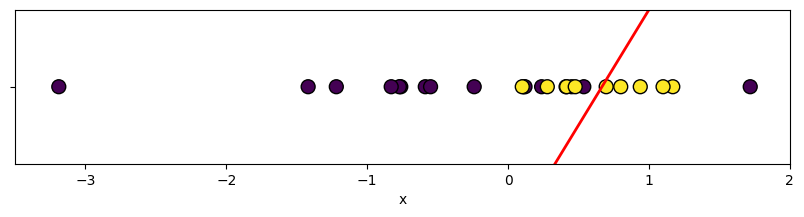

In [25]:
a = 3
b = -2
model_y = a * x + b
x = np.linspace(-3, 3)

plt.figure(figsize=(10, 2))
plt.plot(x, model_y, linewidth=2, c='r')
plt.scatter(X, np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')
plt.ylabel(''); plt.xlabel('x')
plt.yticks(np.arange(0, 1), [''])
plt.ylim(-1, 1); plt.xlim(-3.5, 2)
plt.show()

Визуализируем сигмоиды двух моделей

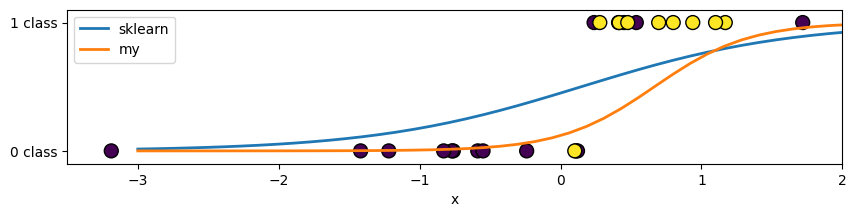

In [26]:
x = np.linspace(-3, 3)
plt.figure(figsize=(10, 2))
plt.scatter(X, y_pred_cl, c=y, s=100, edgecolors='black')
plt.plot(x, sigmoid(model_y_sk), linewidth=2, label='sklearn')
plt.plot(x, sigmoid(model_y), linewidth=2, label='my')
plt.ylabel(''); plt.xlabel('x')
plt.yticks(np.arange(0, 2), ['0 class','1 class'])
plt.ylim(-0.1, 1.1); plt.xlim(-3.5, 2)
plt.legend()
plt.show()

Составим все данные в одну таблицу:
- x -это точки, на которых строим модель
- y -это настоящая целевая переменна, которую хотим предсказать
- pred_model_good -это значения на линии по координатам x первой модели, имеем предсказания модель LinearRegression
- pred_bad_model -это значения ни линии по координатам x второй модели, которая создана вручную, а не силами sklearn

In [27]:
import pandas as pd

df = pd.DataFrame({
    'X': np.squeeze(X),
    'y': y,
    'pred_sk_model': sigmoid(np.squeeze(model_a * X + model_b)),
    'pred_my_model': sigmoid(np.squeeze(a * X + b))
})

df.head()

,X,y,pred_sk_model,pred_my_model
0,-0.761273,0,0.227606,0.013602
1,-1.418692,0,0.108508,0.001915
2,0.451290,1,0.600835,0.343862
3,-0.771116,0,0.225287,0.013212
4,0.238207,0,0.530552,0.216636


In [28]:
df['sk_class'] = (df['pred_sk_model'] > 0.5).astype('int')
df['my_class'] = (df['pred_my_model'] > 0.5).astype('int')
df.head()

,X,y,pred_sk_model,pred_my_model,sk_class,my_class
0,-0.761273,0,0.227606,0.013602,0,0
1,-1.418692,0,0.108508,0.001915,0,0
2,0.451290,1,0.600835,0.343862,1,0
3,-0.771116,0,0.225287,0.013212,0,0
4,0.238207,0,0.530552,0.216636,1,0


Сколько раз каждая модель ошиблась?

In [29]:
df.shape[0]

25

In [30]:
df[df['sk_class'] != df['y']]

,X,y,pred_sk_model,pred_my_model,sk_class,my_class
4,0.238207,0,0.530552,0.216636,1,0
5,1.718733,0,0.892216,0.959152,1,1
8,0.110466,1,0.487642,0.158611,0,0
10,0.537601,0,0.628323,0.404392,1,0
19,0.100986,1,0.484457,0.154852,0,0


In [31]:
(df['sk_class'] == df['y']).sum()

20

In [32]:
(df['my_class'] == df['y']).sum()

17

## Правдоподобие

Рассчитаем правдободобие для трех элементов:

In [33]:
df.head(3)

,X,y,pred_sk_model,pred_my_model,sk_class,my_class
0,-0.761273,0,0.227606,0.013602,0,0
1,-1.418692,0,0.108508,0.001915,0,0
2,0.451290,1,0.600835,0.343862,1,0


- для третьей точки правдоподобие равно 60%
- для второй точки правдоподобие равно 90%
- для первой точки правдоподобие равно 78%

Для всей этой системы из трех точек общее правдободовие равно:

In [34]:
0.78 * 0.90 * 0.6

0.4212

Рассчитаем правдоподобие для всех точек:

In [35]:
# для точек первого класса
likehood_1 = np.prod(df[df['y'] == 1]['pred_sk_model'])
likehood_1

0.00361830886991595

In [36]:
# для точек нулевого класса
likehood_0 = np.prod(1 - df[df['y'] == 0]['pred_sk_model'])
likehood_0

0.0011277459599455537

In [37]:
# для всех точек
likehood = likehood_0 * likehood_1
likehood

4.080533209882874e-06

In [38]:
# усредним
likehood / df.shape[0]

1.6322132839531496e-07

Получилось очень маленькое значение

In [39]:
# пролагорифмируем значение правдоподобия
- np.log(likehood) / df.shape[0]

0.4963713155756178

Такими нехитрыми действиями мы получили значение функции **logloss**

In [40]:
# Проверим:
from sklearn.metrics import log_loss

log_loss(y, df['pred_sk_model'])

0.4963713155756178

Посчитаем знаяение функции **logloss** для нашей модели

In [41]:
- np.log(np.prod(df[df['y'] == 1]['pred_my_model']) * np.prod(1 - df[df['y'] == 0]['pred_my_model'])) / df.shape[0]

0.6310887863810843

In [42]:
log_loss(y, df['pred_my_model'])

0.6310887863810843

## Как обучается логистическая регрессия?

Рисуем функцию потерь

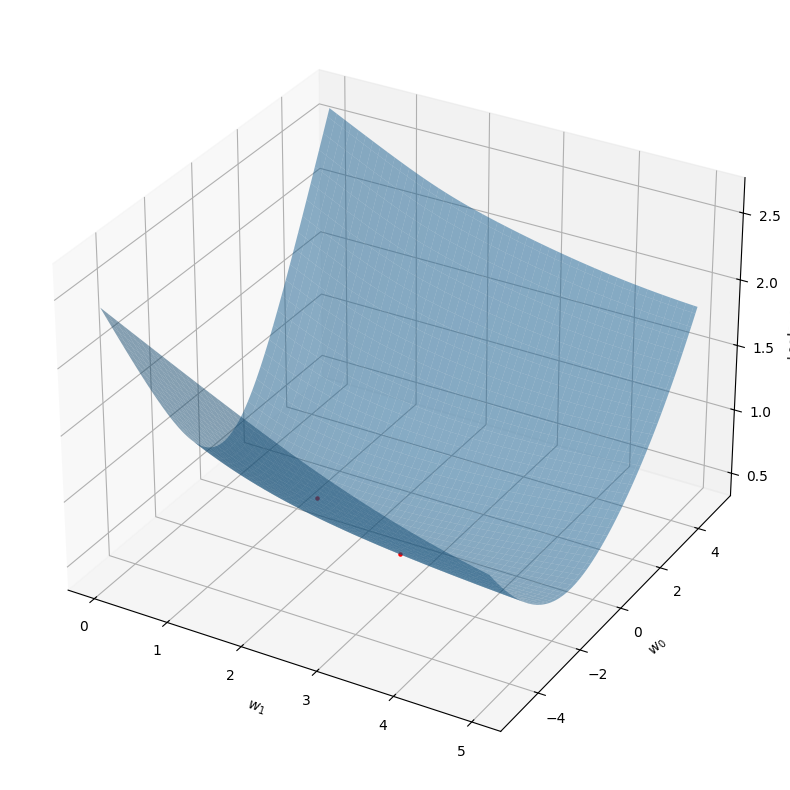

In [43]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

def logloss(w1, w0):
    y_pred = sigmoid(w1 * X + w0)
    return log_loss(y, y_pred)

coefs_a = np.linspace(0, 5, num=100)
coefs_b = np.linspace(-5, 5, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([logloss(i, j) for i, j in zip(np.ravel(w1), np.ravel(w0))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w1, w0, Z, alpha=.5)
ax.scatter(model_a, model_b, logloss(model_a, model_b), c='r', s=5)
ax.scatter(a, b, logloss(a, b), c='r', s=5)

ax.set_xlabel(r'$w_1$')
ax.set_ylabel(r'$w_0$')
ax.set_zlabel('Logloss')

plt.show()

In [44]:
X

array([[-0.76127322],
       [-1.41869179],
       [ 0.45129046],
       [-0.77111621],
       [ 0.23820651],
       [ 1.71873313],
       [ 0.41169756],
       [-0.82914259],
       [ 0.11046641],
       [ 0.69649121],
       [ 0.53760054],
       [-0.587295  ],
       [-3.1882251 ],
       [ 0.12046015],
       [ 1.16915177],
       [ 0.41580869],
       [-0.2402943 ],
       [ 0.93843451],
       [ 1.10014328],
       [ 0.10098614],
       [-1.21878863],
       [ 0.27863321],
       [ 0.79977834],
       [-0.54989369],
       [ 0.47683863]])

In [45]:
X = np.c_[np.ones_like(X), X]
X

array([[ 1.        , -0.76127322],
       [ 1.        , -1.41869179],
       [ 1.        ,  0.45129046],
       [ 1.        , -0.77111621],
       [ 1.        ,  0.23820651],
       [ 1.        ,  1.71873313],
       [ 1.        ,  0.41169756],
       [ 1.        , -0.82914259],
       [ 1.        ,  0.11046641],
       [ 1.        ,  0.69649121],
       [ 1.        ,  0.53760054],
       [ 1.        , -0.587295  ],
       [ 1.        , -3.1882251 ],
       [ 1.        ,  0.12046015],
       [ 1.        ,  1.16915177],
       [ 1.        ,  0.41580869],
       [ 1.        , -0.2402943 ],
       [ 1.        ,  0.93843451],
       [ 1.        ,  1.10014328],
       [ 1.        ,  0.10098614],
       [ 1.        , -1.21878863],
       [ 1.        ,  0.27863321],
       [ 1.        ,  0.79977834],
       [ 1.        , -0.54989369],
       [ 1.        ,  0.47683863]])

In [46]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def logloss(y, y_proba):
    logloss_1 = np.sum(np.log(y_proba[y == 1] + 1e-30))
    logloss_0 = np.sum(np.log(1 - y_proba[y == 0] + 1e-30))
    logloss_total = - (logloss_0 + logloss_1) / len(y)
    return logloss_total


# def gr_logloss(X, W, y):
#     y_proba = sigmoid(X @ W)
#     grad = X.T @ (y_proba - y)
#     return grad


def gr_logloss(X, W, y):
    y_proba = sigmoid(X @ W)
    grad = X.T @ (y - y_proba)
    return grad

Итерация: 0
Logloss 0.7809352018720266
Accuracy 0.16
-------------------------------------------
Итерация: 80
Logloss 0.5979220700310761
Accuracy 0.84
-------------------------------------------
Итерация: 160
Logloss 0.5122672986031042
Accuracy 0.84
-------------------------------------------
Итерация: 240
Logloss 0.48223175784563155
Accuracy 0.84
-------------------------------------------


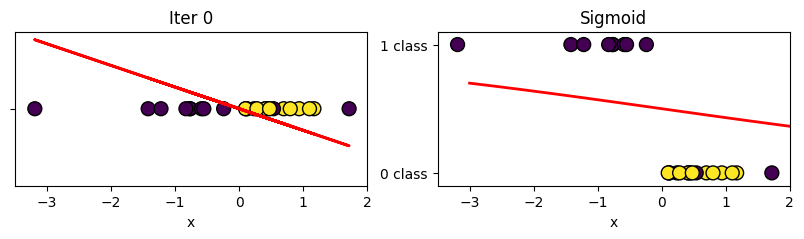

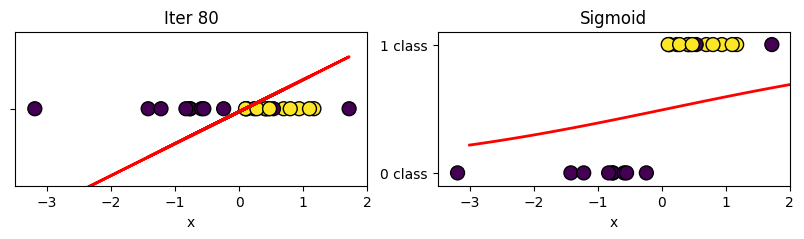

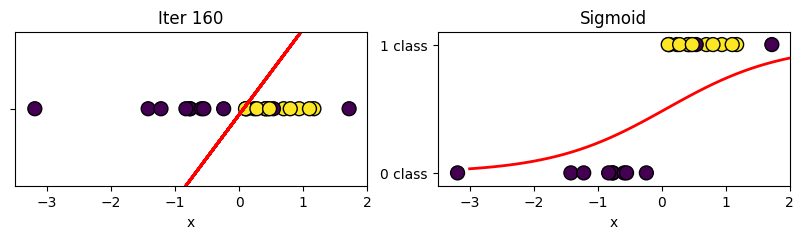

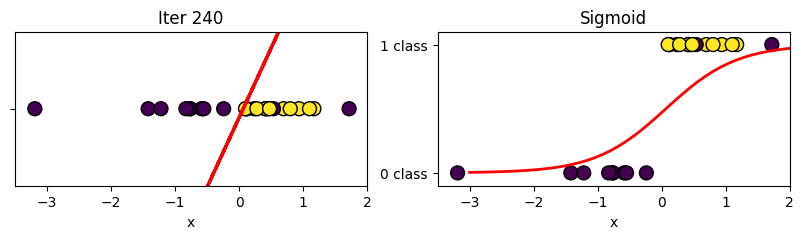

In [47]:
# Установка минимального значения, на которое должны изменяться веса:
eps = 0.0001

# Первоначальная точка:
np.random.seed(9)
W = np.random.randn(X.shape[1])

# Размер шага:
learning_rate = 0.001

next_W = W

# Количество итераций:
n = 250

for i in range(n):
    cur_W = next_W
    # движение в негативную сторону вычисляемого градиента
    # next_W = cur_W - learning_rate * gr_logloss(X, W, y)
    next_W = cur_W + learning_rate * gr_logloss(X, W, y)
    # остановка когда достигнута необходимая степень точности
    if np.linalg.norm(cur_W - next_W) <= eps:
        break

    if i % 80 == 0:
        print(f"Итерация: {i}")
        y_proba = sigmoid(X @ next_W)
        y_class = np.where(y_proba >= 0.5, 1, 0)
        accuracy = (y_class == y).sum() / len(y)
        print(f"Logloss {logloss(y, y_proba)}")
        print(f"Accuracy {accuracy}")
        print('-------------------------------------------')

        model_grad = next_W @ X.T
        plt.figure(figsize=(10, 2))

        plt.subplot(121)
        plt.plot(X[:, 1], model_grad, linewidth=2, c='r', label='gradient')
        plt.scatter(X[:, 1], np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')
        plt.ylabel(''); plt.xlabel('x')
        plt.yticks(np.arange(0, 1), [''])
        plt.title(f"Iter {i}")
        plt.ylim(-1, 1); plt.xlim(-3.5, 2)

        plt.subplot(122)
        x_ones = np.c_[np.ones_like(x), x]
        model_pred_x = next_W @ x_ones.T

        plt.plot(x, sigmoid(model_pred_x), linewidth=2, c='r')
        plt.scatter(X[:, 1], sigmoid(model_grad) >= 0.5, c=y, s=100, edgecolors='black')
        plt.ylabel(''); plt.xlabel('x')
        plt.yticks(np.arange(0, 2), ['0 class', '1 class'])
        plt.title("Sigmoid")
        plt.ylim(-0.1, 1.1); plt.xlim(-3.5, 2)

(-3.5, 2.0)

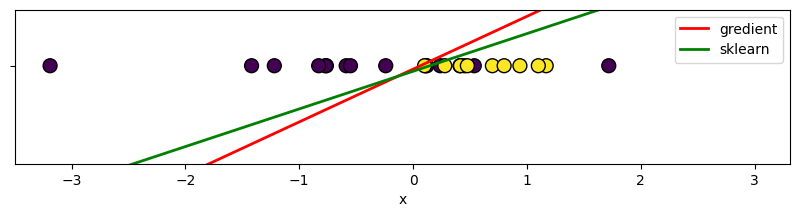

In [48]:
model_grad = next_W[1] * x + next_W[0]

plt.figure(figsize=(10, 2))
plt.plot(x, model_grad, linewidth=2, c='r', label='gredient')
plt.plot(x, model_y_sk, linewidth=2, c='g', label='sklearn')
plt.scatter(X[:, 1], np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')
plt.ylabel(''); plt.xlabel('x')
plt.yticks(np.arange(0, 1), [''])
plt.legend()
plt.ylim(-1, 1); plt.ylim(-3.5, 2)

In [49]:
y_proba = sigmoid(X @ next_W)
y_proba

array([0.17397633, 0.05746958, 0.67451307, 0.17132527, 0.58100106,
       0.95765024, 0.65791435, 0.15634526, 0.52149209, 0.76692197,
       0.70918156, 0.22624161, 0.00216344, 0.52619232, 0.88916558,
       0.65965685, 0.36000043, 0.83851398, 0.87567825, 0.51702983,
       0.08163167, 0.59943501, 0.79991558, 0.23882479, 0.68499901])

In [50]:
np.where(y_proba > 0.5, 1, 0)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1])

## Многомерная логистическая регрессия

Генерируем данные

In [51]:
X, y = make_classification(n_samples=50, n_features=2,
                          n_informative=2, n_redundant=0,
                          random_state=11)
display(X[:5,], y[:5])

array([[-0.58426249, -0.26304715],
       [-0.87385157,  0.03334535],
       [-0.83376357,  0.56089118],
       [-0.36054172,  1.23330648],
       [-0.96996002, -0.51336961]])

array([0, 0, 0, 1, 0])

In [52]:
X.mean(axis=0), X.std(axis=0)

(array([-0.07621679,  0.17324754]), array([1.12749852, 1.21249228]))

In [53]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.mean(axis=0), X.std(axis=0)

(array([-7.10542736e-17,  3.10862447e-17]), array([1., 1.]))

Визуализируем данные:

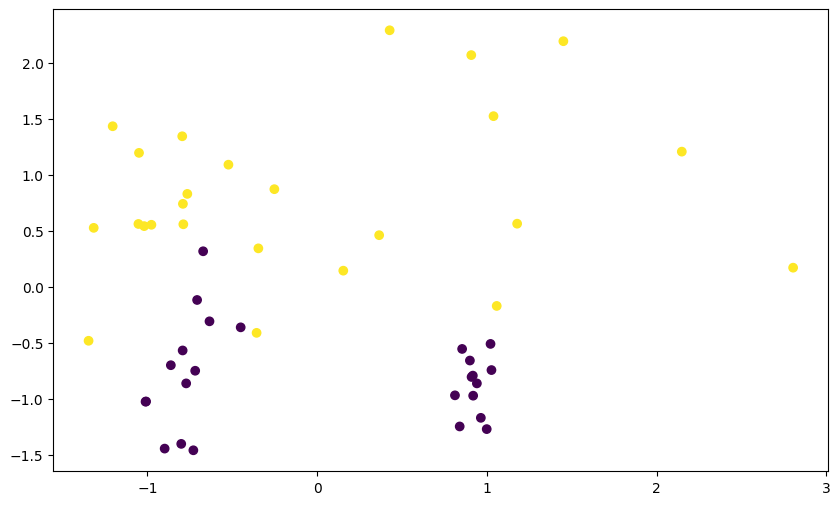

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)

Обучим подель из **sklearn**

In [55]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [56]:
model.coef_, model.intercept_

(array([[0.00646678, 2.57414565]]), array([0.24683862]))

In [57]:
model.predict(X[:5])

array([0, 0, 1, 1, 0])

In [58]:
df = pd.DataFrame(X)
df['y'] = y
df['pred_cl'] = model.predict(X)
df['pred_proba'] = sigmoid(X.dot(model.coef_.T) + model.intercept_)

df.head()

,0,1,y,pred_cl,pred_proba
0,-0.450595,-0.359833,0,0,0.335740
1,-0.707438,-0.115384,0,0,0.486316
2,-0.671883,0.319708,0,1,0.743734
3,-0.252173,0.874281,1,1,0.923842
4,-0.792678,-0.566286,0,0,0.228643


Проверим точность модели:

In [59]:
(df['y'] == df['pred_cl']).mean()

0.92

In [60]:
model.score(X, y)

0.92